### Импорт библиотек

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt

### Подготовка датасета

In [2]:
data = pd.read_csv('toy.csv', sep = ';')
del data['Unnamed: 6'] #Удаляем, так как это пустой столбец
data.head()

,Number,City,Gender,Age,Income,Illness
0,1,Dallas,Male,41,40367.0,No
1,2,Dallas,Male,54,45084.0,No
2,3,Dallas,Male,42,52483.0,No
3,4,Dallas,Male,40,40941.0,No
4,5,Dallas,Male,46,50289.0,No


In [3]:
data.dtypes

Number       int64
City        object
Gender      object
Age          int64
Income     float64
Illness     object
dtype: object

In [4]:
data['Gender'].value_counts()

Male      145
Female    119
Name: Gender, dtype: int64

In [5]:
data['Illness'].value_counts()

No     240
Yes     24
Name: Illness, dtype: int64

In [6]:
data['City'].value_counts()

Dallas    264
Name: City, dtype: int64

## Кодирование категориальных признаков

In [7]:
data['Gender_1']=data.Gender.replace({'Female':0,'Male':1})
data.drop('Gender', axis = 1, inplace = True)
data['Illness_1']=data.Illness.replace({'No':0,'Yes':1})
data.drop('Illness', axis = 1, inplace = True)
data['Dallas']=data.City.replace({'Dallas':1})
data.drop('City', axis = 1, inplace = True)
data.head()

,Number,Age,Income,Gender_1,Illness_1,Dallas
0,1,41,40367.0,1,0,1
1,2,54,45084.0,1,0,1
2,3,42,52483.0,1,0,1
3,4,40,40941.0,1,0,1
4,5,46,50289.0,1,0,1


In [8]:
data.dtypes

Number         int64
Age            int64
Income       float64
Gender_1       int64
Illness_1      int64
Dallas         int64
dtype: object

## Проверим, есть ли пропущенные значения

In [9]:
data.isnull().sum()

Number       0
Age          0
Income       0
Gender_1     0
Illness_1    0
Dallas       0
dtype: int64

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Number     264 non-null    int64  
 1   Age        264 non-null    int64  
 2   Income     264 non-null    float64
 3   Gender_1   264 non-null    int64  
 4   Illness_1  264 non-null    int64  
 5   Dallas     264 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 12.5 KB


## Построим корреляционную матрицу

<AxesSubplot:>

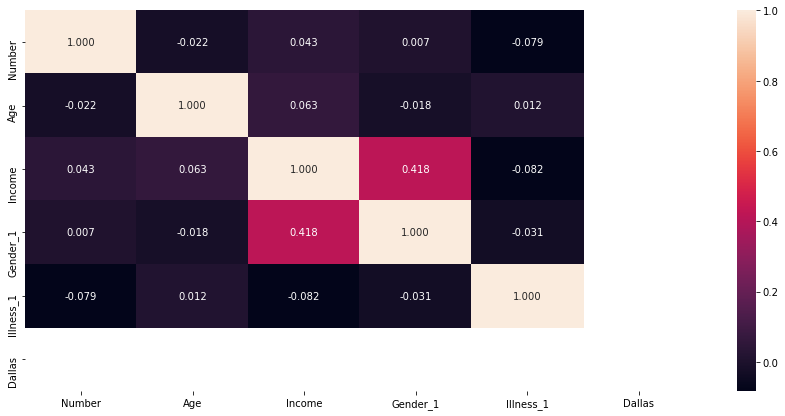

In [11]:
fig, ax = plt.subplots(figsize=(15,7))
sns.heatmap(data.corr(method='pearson'), ax=ax, annot=True, fmt='.3f')

## Разделим выборку на обучающую и тестовую
#### Разделим данные на целевой столбец и признаки

In [12]:
X = data.drop("Gender_1",axis=1)
Y = data["Gender_1"]

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state = 1)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((198, 5), (66, 5), (198,), (66,))

## Метод опорных векторов

In [14]:
def print_metrics(X_train, Y_train, X_test, Y_test, clf):
    clf.fit(X_train, Y_train)
    target = clf.predict(X_test)
    print(f'Средняя абсолютная ошибка: {mean_absolute_error(Y_test, target)}')
    print(f'Коэффициент детерминации: {r2_score(Y_test, target)}')

In [15]:
print_metrics(X_train, Y_train, X_test, Y_test, SVR())

Средняя абсолютная ошибка: 0.3643927519241477
Коэффициент детерминации: 0.1531251587079283


## Метод градиентного бустинга

In [16]:
def print_metrics(X_train, Y_train, X_test, Y_test, clf):
    clf.fit(X_train, Y_train)
    target = clf.predict(X_test)
    print(f'Средняя абсолютная ошибка: {mean_absolute_error(Y_test, target)}')
    print(f'Коэффициент детерминации: {r2_score(Y_test, target)}')

In [17]:
print_metrics(X_train, Y_train, X_test, Y_test, GradientBoostingRegressor(random_state=0))

Средняя абсолютная ошибка: 0.397312107233723
Коэффициент детерминации: 0.07612409095742223


## Выводы:

В РК были использованы метрики:

Mean absolute error - средняя абсолютная ошибка

R2 (коэффициент детерминации) позволяет оценить общее качество модели, чем R2 ближе к 1, тем модель лучше.

Метод градиентного бустинга и метод опорных векторов показали себя примерно одинакого по отношению к данной модели. В выборке слабая связность датасета. Поэтому метрика R2 мала у метода опорных векторов и у метода градинтного бустинга.